In [1]:
import pandas as pd
from dateutil import tz
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od

od.download("https://www.kaggle.com/datasets/budincsevity/szeged-weather")
df: pd.DataFrame = pd.read_csv("szeged-weather/weatherHistory.csv")

print(df.info())
print('\n')
print(df.isna().sum())

def draw_heat_map(corr_matrix: pd.DataFrame) -> None:
    sns.heatmap(data=corr_matrix, cmap='coolwarm', annot=True, annot_kws={"fontsize": 5.5})

def draw_hist(data: pd.DataFrame, bins: int = 100) -> None:
    plt.hist(data, bins=bins)



Dataset URL: https://www.kaggle.com/datasets/budincsevity/szeged-weather


100%|██████████| 2.23M/2.23M [00:00<00:00, 3.22MB/s]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB
None


Formatted Date                0
Summary                      

In [121]:
print(df['Formatted Date'].value_counts(dropna=False))

Formatted Date
2010-08-02 01:00:00.000 +0200    2
2010-08-02 02:00:00.000 +0200    2
2010-08-02 03:00:00.000 +0200    2
2010-08-02 04:00:00.000 +0200    2
2010-08-02 05:00:00.000 +0200    2
                                ..
2009-03-09 19:00:00.000 +0100    1
2009-03-09 18:00:00.000 +0100    1
2009-03-09 17:00:00.000 +0100    1
2009-03-09 16:00:00.000 +0100    1
2009-05-01 03:00:00.000 +0200    1
Name: count, Length: 96429, dtype: int64


In [122]:
to_zone: tz.tzlocal = tz.tzlocal()
dates: pd.Series = df['Formatted Date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f %z").astimezone(tz=to_zone))
df.drop(['Formatted Date'], axis=1, inplace=True)
df['Year'] = dates.dt.year
df['Month'] = dates.dt.month
df['Day'] = dates.dt.day
df['Weekday'] = dates.dt.weekday
df['Hour'] = dates.dt.hour

In [123]:
print(df['Summary'].value_counts(dropna=False))

Summary
Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Hu

In [124]:
print(df['Daily Summary'].value_counts())

Daily Summary
Mostly cloudy throughout the day.                                                            20085
Partly cloudy throughout the day.                                                             9981
Partly cloudy until night.                                                                    6169
Partly cloudy starting in the morning.                                                        5184
Foggy in the morning.                                                                         4201
                                                                                             ...  
Mostly cloudy until night and breezy starting in the evening continuing until night.            24
Mostly cloudy starting in the morning continuing until night and breezy in the afternoon.       24
Mostly cloudy starting in the morning and breezy in the evening.                                24
Breezy starting in the morning continuing until night.                                         

In [125]:
df.drop('Summary', axis=1, inplace=True)
df.drop('Daily Summary', axis=1, inplace=True)

In [126]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Precip Type               95936 non-null  object 
 1   Temperature (C)           96453 non-null  float64
 2   Apparent Temperature (C)  96453 non-null  float64
 3   Humidity                  96453 non-null  float64
 4   Wind Speed (km/h)         96453 non-null  float64
 5   Wind Bearing (degrees)    96453 non-null  float64
 6   Visibility (km)           96453 non-null  float64
 7   Loud Cover                96453 non-null  float64
 8   Pressure (millibars)      96453 non-null  float64
 9   Year                      96453 non-null  int32  
 10  Month                     96453 non-null  int32  
 11  Day                       96453 non-null  int32  
 12  Weekday                   96453 non-null  int32  
 13  Hour                      96453 non-null  int32  
dtypes: flo

In [127]:
print(df['Precip Type'].value_counts(dropna=False))

Precip Type
rain    85224
snow    10712
NaN       517
Name: count, dtype: int64


In [128]:
df['Rain'] = df['Precip Type'].apply(lambda x: float(x == 'rain'))
df['Snow'] = df['Precip Type'].apply(lambda x: float(x == 'snow'))
df.drop(['Precip Type'], axis=1, inplace=True)

In [129]:
print(df['Loud Cover'].value_counts(dropna=False))

Loud Cover
0.0    96453
Name: count, dtype: int64


In [130]:
df.drop('Loud Cover', axis=1, inplace=True)

In [131]:
df['Pressure (millibars)'].value_counts().sort_index()

Pressure (millibars)
0.00       1288
973.78        1
974.52        1
974.78        1
975.12        1
           ... 
1045.90       1
1045.93       1
1046.06       1
1046.26       1
1046.38       1
Name: count, Length: 4979, dtype: int64

In [132]:
df = df[df['Pressure (millibars)'] > 0]

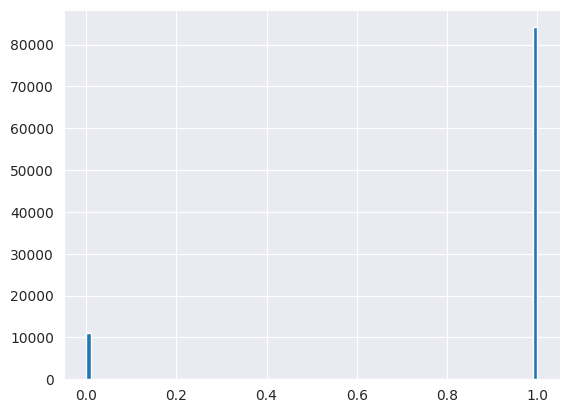

In [133]:
draw_hist(data=df['Rain'])

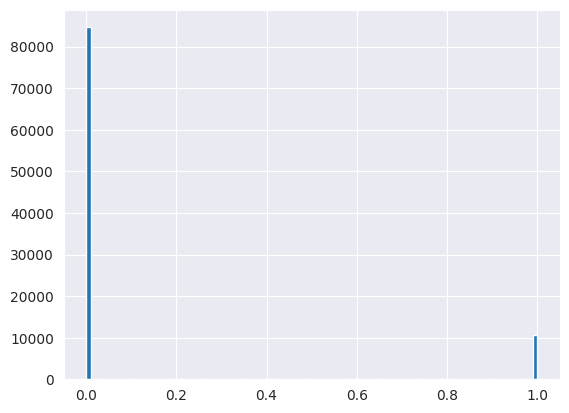

In [134]:
draw_hist(data=df['Snow'])

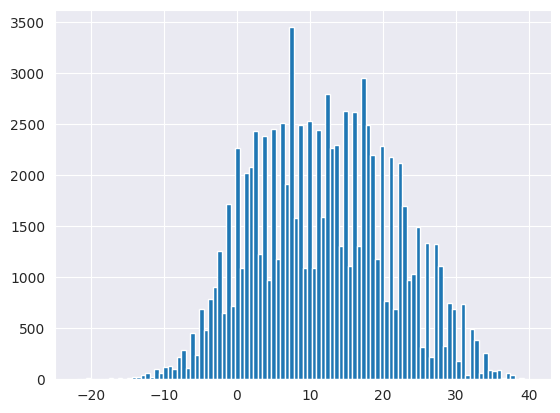

In [135]:
draw_hist(data=df['Temperature (C)'])

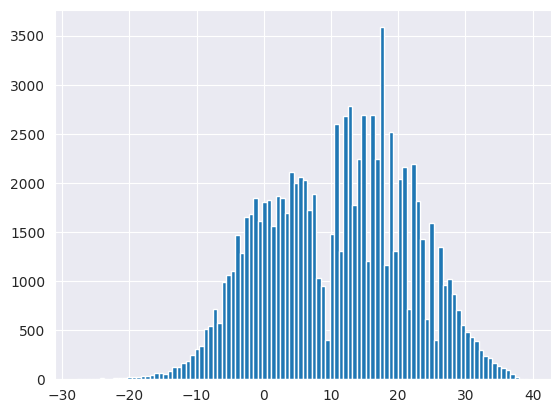

In [136]:
draw_hist(data=df['Apparent Temperature (C)'])

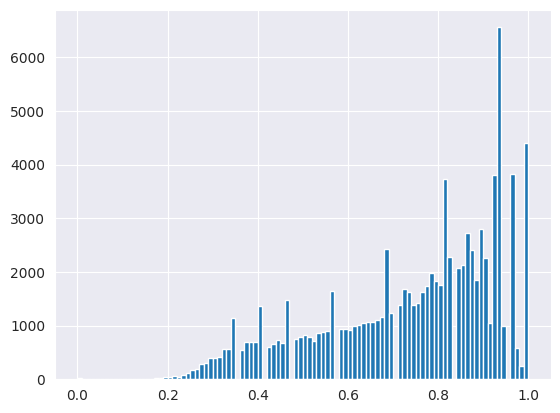

In [137]:
draw_hist(data=df['Humidity'])

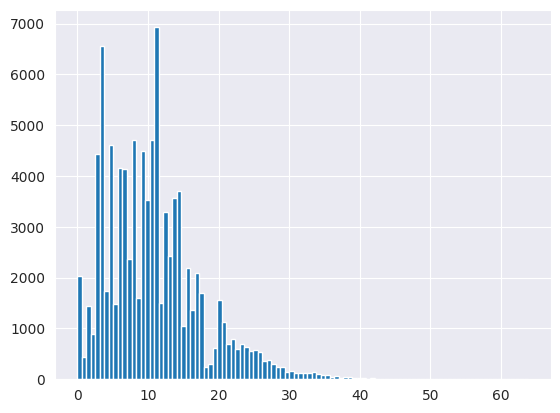

In [138]:
draw_hist(data=df['Wind Speed (km/h)'])

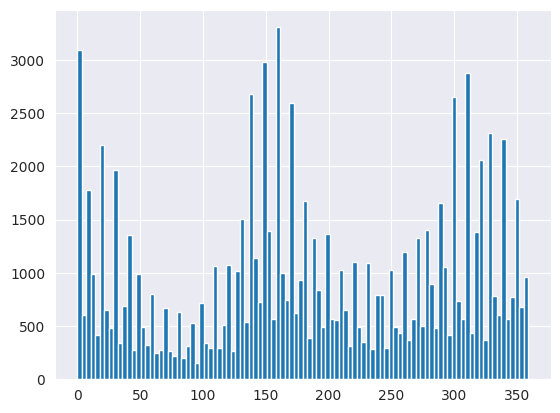

In [139]:
draw_hist(data=df['Wind Bearing (degrees)'])

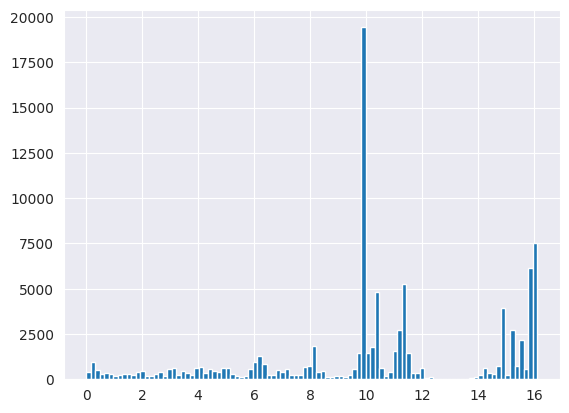

In [140]:
draw_hist(data=df['Visibility (km)'])

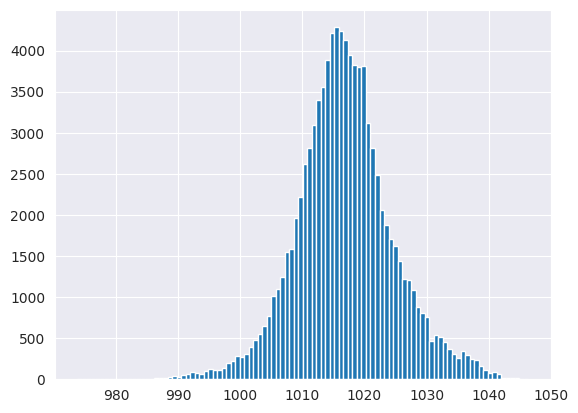

In [141]:
draw_hist(data=df['Pressure (millibars)'])

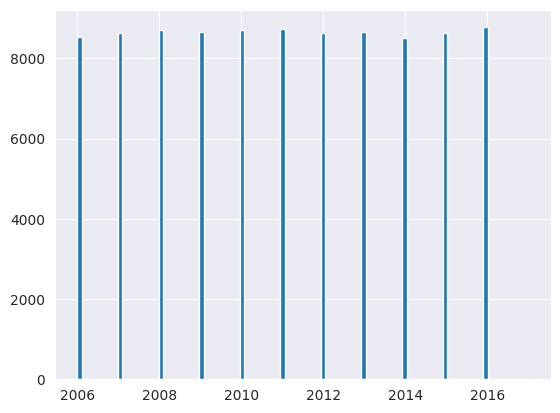

In [142]:
draw_hist(data=df['Year'])

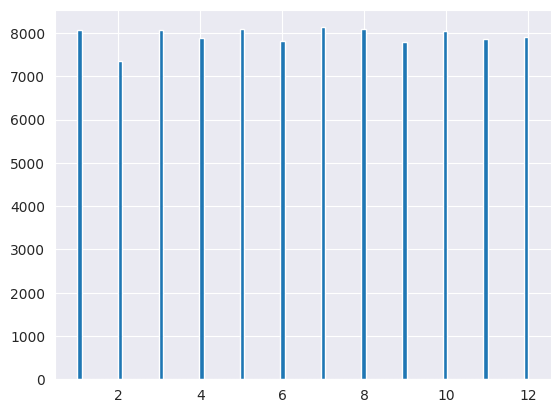

In [143]:
draw_hist(data=df['Month'])

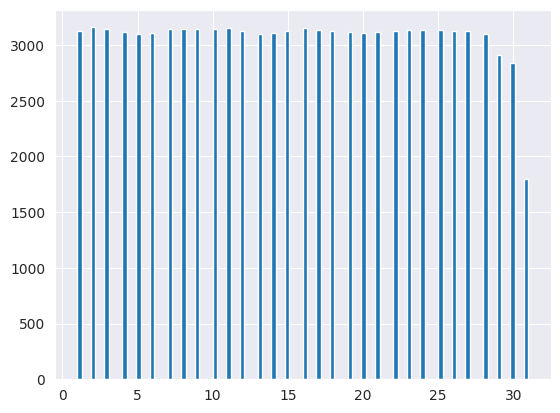

In [144]:
draw_hist(data=df['Day'])

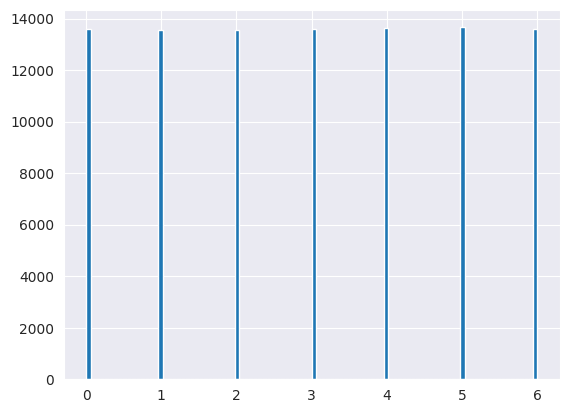

In [145]:
draw_hist(data=df['Weekday'])

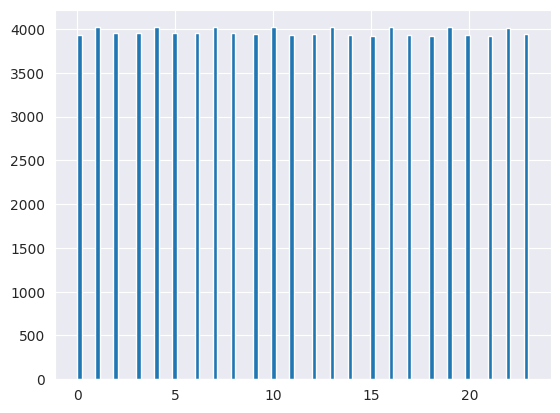

In [146]:
draw_hist(data=df['Hour'])

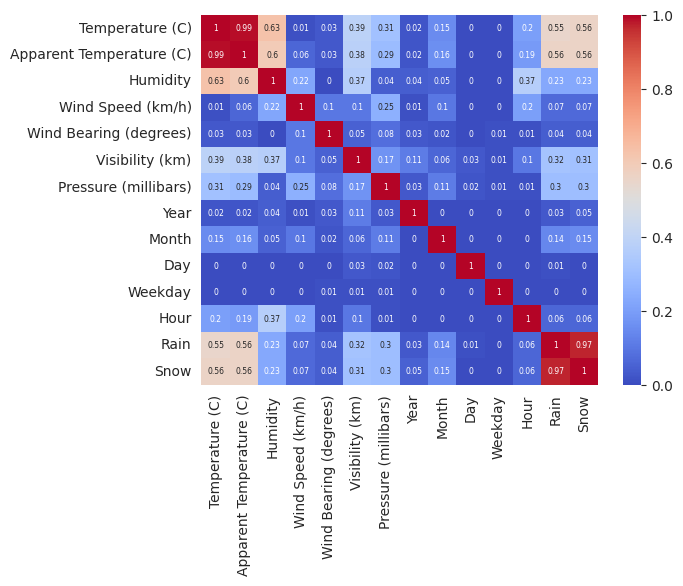

In [147]:
draw_heat_map(df.corr().abs().round(2))

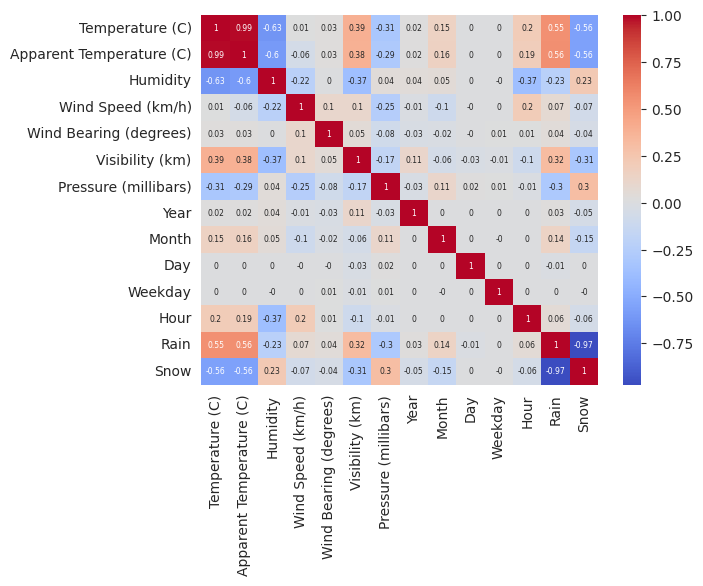

In [148]:
draw_heat_map(df.corr().round(2))

In [149]:
from typing import Dict
from math import log2

def calculate_gain_ratio(df: pd.DataFrame, target: str) -> Dict[str, float]:
    result: Dict[str, float] = {}

    target_entropy: float = calculate_entropy(df[target])

    for c in df:
        entropy_before: float = target_entropy
        entropy_after: float = calculate_child_entropy(df=df, target=target, feature=c)
        split_information: float = calculate_entropy(df[c])
        result[c] = (entropy_before - entropy_after) / split_information

    return result


def calculate_child_entropy(df: pd.DataFrame, target: str, feature: str) -> float:
    result: float = 0

    df_length = df.shape[0]

    for feature_value in df[feature].unique():
        tmp: pd.DataFrame = df[df[feature] == feature_value]
        p: float = tmp.shape[0] / df_length
        result += p * calculate_entropy(tmp[target])

    return result


def calculate_entropy(series: pd.Series) -> float:
    result: float = 0
    size: float = float(series.size)

    for it in series.unique():
        pi: float = series[series == it].shape[0] / size
        result -= pi * log2(pi)

    return result


In [150]:
from math import floor
import numpy as np

n: int = 1 + floor(log2(len(df)))
q: np.ndarray = np.linspace(start=0, stop=1, num=n)

cut_df: pd.DataFrame = pd.DataFrame()
cut_df['Rain'] = pd.cut(x=df['Rain'], bins=[0, 0.5, 1], include_lowest=True)
cut_df['Snow'] = pd.cut(x=df['Snow'], bins=[0, 0.5, 1], include_lowest=True)
cut_df['Year'] = pd.cut(x=df['Year'], bins=range(2005, 2018), include_lowest=False)
cut_df['Month'] = pd.cut(x=df['Month'], bins=range(0, 13), include_lowest=False)
cut_df['Day'] = pd.cut(x=df['Day'], bins=range(0, 32), include_lowest=False)
cut_df['Weekday'] = pd.cut(x=df['Weekday'], bins=range(-1, 7), include_lowest=False)
cut_df['Hour'] = pd.cut(x=df['Hour'], bins=range(-1, 24), include_lowest=False)
cut_df['Visibility (km)'] = pd.cut(x=df['Visibility (km)'], bins=[0, 9.5, 12, 17], include_lowest=True)

manually_cut: list[str] = ['Rain', 'Snow', 'Year', 'Month', 'Day', 'Weekday', 'Hour', 'Visibility (km)']

for c in df:
    if c not in manually_cut:
        cut_df[c] = pd.qcut(x=df[c], q=q)

In [151]:
def print_gain_ratio(df: pd.DataFrame, target: str) -> None:
    gain_ratio: Dict[str, float] = calculate_gain_ratio(df=df, target=target)

    print(target)
    for key, value in sorted(gain_ratio.items(), key=lambda x: x[1], reverse=True):
        print(f'\t{key}: {value}')
    print()


In [152]:
print_gain_ratio(cut_df, 'Temperature (C)')


Temperature (C)
	Temperature (C): 1.0
	Snow: 0.9024018528327853
	Apparent Temperature (C): 0.8238846448684781
	Rain: 0.81852947239424
	Month: 0.2277233539081543
	Visibility (km): 0.14102937822857253
	Humidity: 0.11215122597114677
	Pressure (millibars): 0.04856639590964523
	Hour: 0.03041832187219228
	Year: 0.008211095705061941
	Wind Speed (km/h): 0.008196084950574733
	Wind Bearing (degrees): 0.0045495599129102395
	Day: 0.0029341513172649065
	Weekday: 0.0004492423185887415



In [153]:
print_gain_ratio(cut_df, 'Apparent Temperature (C)')

Apparent Temperature (C)
	Apparent Temperature (C): 1.0
	Temperature (C): 0.8238907602773117
	Snow: 0.7672559042202146
	Rain: 0.689232752171173
	Month: 0.23121319600627813
	Visibility (km): 0.13245246108022157
	Humidity: 0.10531337334996324
	Pressure (millibars): 0.044376752700600354
	Hour: 0.029197269727147018
	Wind Speed (km/h): 0.008979755553467503
	Year: 0.007449126606691378
	Wind Bearing (degrees): 0.0046466897084542005
	Day: 0.0024830120921000365
	Weekday: 0.0004100759349582225



In [154]:
from sklearn.feature_selection import SelectKBest, f_regression

def select_best_k_features_sklearn(df: pd.DataFrame, k: int, target: str) -> pd.DataFrame:
    x: pd.DataFrame = df[[col for col in df.columns if col != target]]
    y: pd.DataFrame = df[target]
    reg = SelectKBest(k=k, score_func=f_regression).fit(X=x, y=y)
    return x[[val for i, val in enumerate(x.columns) if reg.get_support()[i]]]

In [155]:
best_k_features_df: pd.DataFrame = select_best_k_features_sklearn(df=df, k=5, target='Temperature (C)')
for column in best_k_features_df.columns:
    print(column)

Apparent Temperature (C)
Humidity
Visibility (km)
Rain
Snow
